# 이변량_범주 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자

|	변수	|	설명	|	값 설명	|  
|	----	|	----	|	----	|  
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|  
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|  
|	Sex	|	성별	|		|  
|	Age	|	Age in years	|		|  
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|  
|	Parch	|	# of parents / children aboard the Titanic	|		|  
|	Ticket	|	Ticket number	|		|  
|	Fare	|	Passenger fare	|		|  
|	Cabin	|	Cabin number	|		|  
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|  


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


범주별 숫자를 비교할 때 사용되는 방식은 **범주별 평균 비교** 입니다.  


## 2.시각화
titanic data에서 Age를 Y로 두고 비교해 봅시다.

### (1) 평균 비교 : barplot

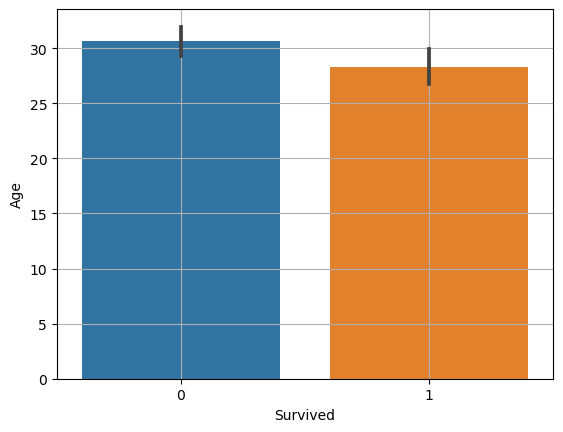

In [3]:
sns.barplot(x="Survived", y="Age", data=titanic)
plt.grid()
plt.show()

In [ ]:
titanic.loc[:10, ['Survived','Age']]

위 두 범주간에 평균에 차이가 있나요?

### (2) (추가) boxplot

In [ ]:
sns.boxplot(x='Survived', y = 'Age', data = titanic)
plt.show()

## 3.수치화

### (1) t-test

두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test와 양측검정만 다룹니다. 
* 우리는 X --> Y의 관계에서 ,두 변수간에 관련이(차이가) 있는지, 없는지를 확인하는 것이 제일 중요하기 때문입니다.

* 주의사항 : 데이터에 NaN이 있으면 계산이 안됩니다. .notnull() 등으로 NaN을 제외한 데이터를 사용해야 합니다.

* t 통계량
    * 두 평균의 차이를 표준오차로 나눈 값.
    * 기본적으로는 두 평균의 차이로 이해해도 좋습니다.
    * 우리의 가설(대립가설)은 차이가 있다는 것이므로, t 값이 크던지 작던지 하기를 바랍니다. 
    * 보통, t 값이 -2보다 작거나, 2보다 크면 차이가 있다고 봅니다. 

* 이번엔 타이타닉 데이터로 시도해 봅시다.
    * 생존여부 --> Age : 생존여부 별로 나이에 차이가 있을것이다.


#### 1) 데이터 준비

In [4]:
# 먼저 NaN이 있는지 확인해 봅시다.
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]

In [6]:
# 두 그룹으로 데이터 저장
died = temp.loc[temp['Survived']==0, 'Age']
survived = temp.loc[temp['Survived']==1, 'Age']

#### 2) t-test

In [7]:
spst.ttest_ind(died, survived)

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] 성별에 따라 운임에 차이가 있을 것이다.

In [12]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

범주형 갯수 판단

In [22]:
male = titanic.loc[titanic['Sex']=='male', 'Fare']
female = titanic.loc[titanic['Sex']=='female', 'Fare']
spst.ttest_ind(male, female)

Ttest_indResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08)

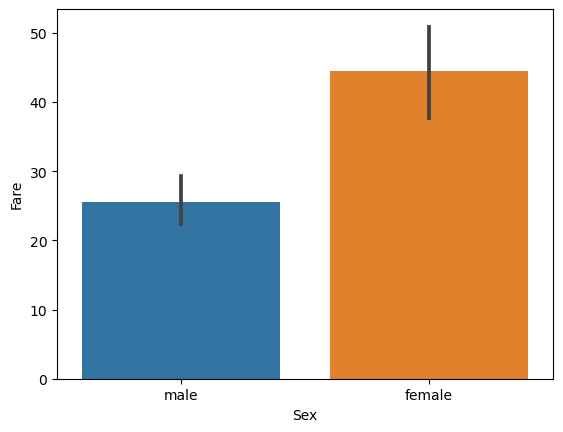

In [25]:
sns.barplot(x='Sex', y = 'Fare', data = titanic)
plt.show()

* [문2] 생존여부에 따라 운임에 차이가 있을 것이다.

In [15]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
died = titanic.loc[titanic['Survived']==0, 'Fare']
survived = titanic.loc[titanic['Survived']==1, 'Fare']
spst.ttest_ind(died, survived)

Ttest_indResult(statistic=-7.939191660871055, pvalue=6.120189341924198e-15)

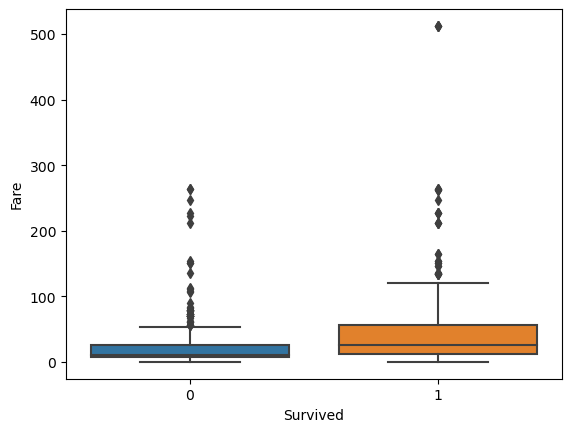

In [20]:
sns.boxplot(x='Survived', y = 'Fare', data = titanic)
plt.show()

### (2) anova


* 분산 분석 **AN**alysis **O**f **VA**riance
* 여러 집단 간에 차이는 어떻게 비교할 수 있을까요?
* 여기서 기준은 전체 평균 입니다.
* 𝐹 통계량 = 
    * (집단 간 분산)/(집단 내 분산) = (전체 평균 − 각 집단 평균)/(각 집단의 평균 − 개별 값)
    * 값이 대략 2~3 이상이면 차이가 있다고 판단합니다.

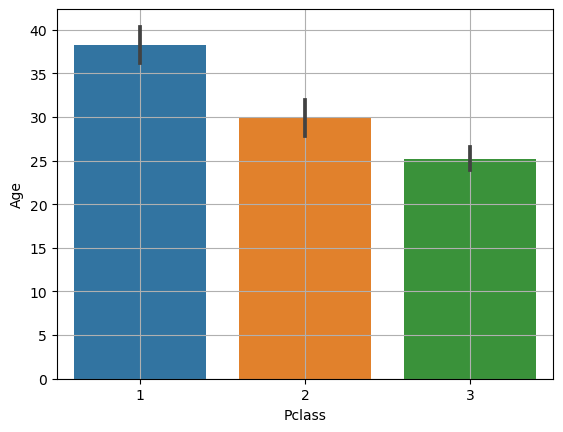

In [26]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.grid()
plt.show()

#### 1) 데이터 준비

In [27]:
# 1) 분산 분석을 위한 데이터 만들기
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

#### 2) anova

In [28]:
spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] 승선지역(Embarked)별로 운임에 차이가 있을 것이다. 
    * 시각화와 수치화로 확인해 봅시다.

In [30]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
S = titanic.loc[titanic['Embarked'] == 'S', 'Fare']
C = titanic.loc[titanic['Embarked'] == 'C', 'Fare']
Q = titanic.loc[titanic['Embarked'] == 'Q', 'Fare']
spst.f_oneway(S, C, Q)

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)

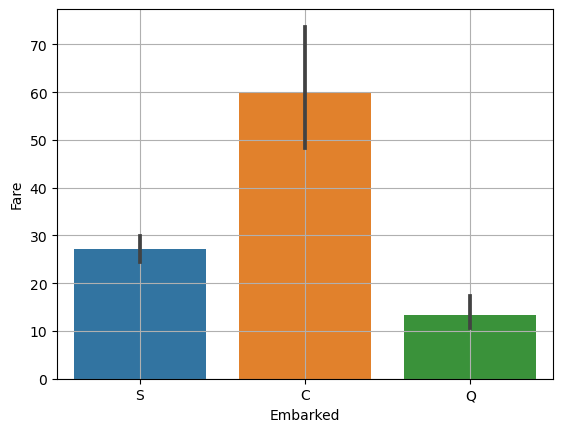

In [33]:
sns.barplot(x="Embarked", y="Fare", data=titanic)
plt.grid()
plt.show()

C의 신뢰구간이 길다 -> 표본이 적거나 표본의 편차가 크거나 

* [문2] 객실등급(Pclass)별로 운임에 차이가 있을 것이다. 
    * 시각화와 수치화로 확인해 봅시다.

## 4.복습문제

air quality 데이터셋으로 다음 문제를 풀어 봅시다.

* 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터불러오기

In [ ]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air['Weekend'] = np.where(air['Weekday'] >=5, 1, 0)
air.head()

* 1) 주말여부(Weekend) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

* 2) 요일(Weekday) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

* 3) 월(Month) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.